# Importations

In [55]:
from load_xdf import load_xdf_to_raw, data_path, find_xdf_files
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from pyprep.find_noisy_channels import NoisyChannels
from pathlib import Path

xdf_files = find_xdf_files(data_path)
file_name = xdf_files[1]
xdf_files

[WindowsPath('D:/pro/P6661_HB_T4.xdf'),
 WindowsPath('D:/pro/emile_final_bci.xdf')]

In [56]:
raw = load_xdf_to_raw(file_name)
raw

2024-06-27 14:14:33,688 - pyxdf.pyxdf - INFO - Importing XDF file D:\pro\emile_final_bci.xdf...
2024-06-27 14:14:37,647 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-06-27 14:14:37,698 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=72, n_times=314650
    Range : 0 ... 314649 =      0.000 ...   614.549 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=314650
    Range : 0 ... 314649 =      0.000 ...   614.549 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [57]:
raw.set_channel_types({'EX1': 'eeg', 'EX2': 'eeg'}) # include them in filtering

C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3503940526.py:1: RuntimeWarning: The unit for channel(s) EX1, EX2 has changed from NA to V.
  raw.set_channel_types({'EX1': 'eeg', 'EX2': 'eeg'}) # include them in filtering


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"66 EEG, 6 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


# Preprocessing

In [58]:
# Apply a bandpass filter to the raw data between 0.3 Hz and 40 Hz
raw.filter(l_freq=0.3, h_freq=40, n_jobs=-1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 5633 samples (11.002 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    8.8s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"66 EEG, 6 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.30 Hz
Lowpass,40.00 Hz


In [59]:
r = raw.copy()
r.filter(l_freq=1, h_freq=None, n_jobs=-1)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.7s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"66 EEG, 6 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [60]:
raw.set_channel_types({'EX1': 'misc', 'EX2': 'misc'})
r.set_channel_types({'EX1': 'misc', 'EX2': 'misc'})

C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3098617103.py:1: RuntimeWarning: The unit for channel(s) EX1, EX2 has changed from V to NA.
  raw.set_channel_types({'EX1': 'misc', 'EX2': 'misc'})
C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3098617103.py:2: RuntimeWarning: The unit for channel(s) EX1, EX2 has changed from V to NA.
  r.set_channel_types({'EX1': 'misc', 'EX2': 'misc'})


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [61]:
#To detect bad channels automatically using SNR, correlation, HighFrequence noise and Ransac
noisy=NoisyChannels(r)
noisy.find_all_bads()
bad_chs = noisy.get_bads()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/122 [00:00<?,       ?it/s]


RANSAC done!


In [62]:
bad_chs

['P7', 'FC1', 'P3', 'PO3', 'FT7']

In [63]:
raw.info['bads'] = bad_chs
r.info['bads'] = bad_chs

raw.interpolate_bads()
r.interpolate_bads()

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [64]:
# Perform Independent Component Analysis (ICA) on the copied data
ica = ICA(random_state=21, max_iter='auto')
ica.fit(r)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 59 components
Fitting ICA took 23.9s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,72 iterations on raw data (314650 samples)
ICA components,59
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [65]:
%matplotlib qt
ica.plot_components(inst=r, sensors=True, )

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 19 Axes>]

In [71]:
import mne_icalabel
iclabels = mne_icalabel.label_components(r, ica, method = 'iclabel')

C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3343336392.py:2: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  iclabels = mne_icalabel.label_components(r, ica, method = 'iclabel')
C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3343336392.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  iclabels = mne_icalabel.label_components(r, ica, method = 'iclabel')
C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\3343336392.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decomposi

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [72]:
labels = iclabels["labels"]
exclude_idx = [
    idx for idx, label in enumerate(labels) if label not in ["brain", "other"]
]
print(f"Excluding these ICA components: {exclude_idx}")

Excluding these ICA components: [1, 2, 3, 4, 5, 9, 11, 14, 21, 24, 26, 29, 36, 43, 44, 46, 48, 54]


Creating RawArray with float64 data, n_channels=59, n_times=314650
    Range : 0 ... 314649 =      0.000 ...   614.549 secs
Ready.


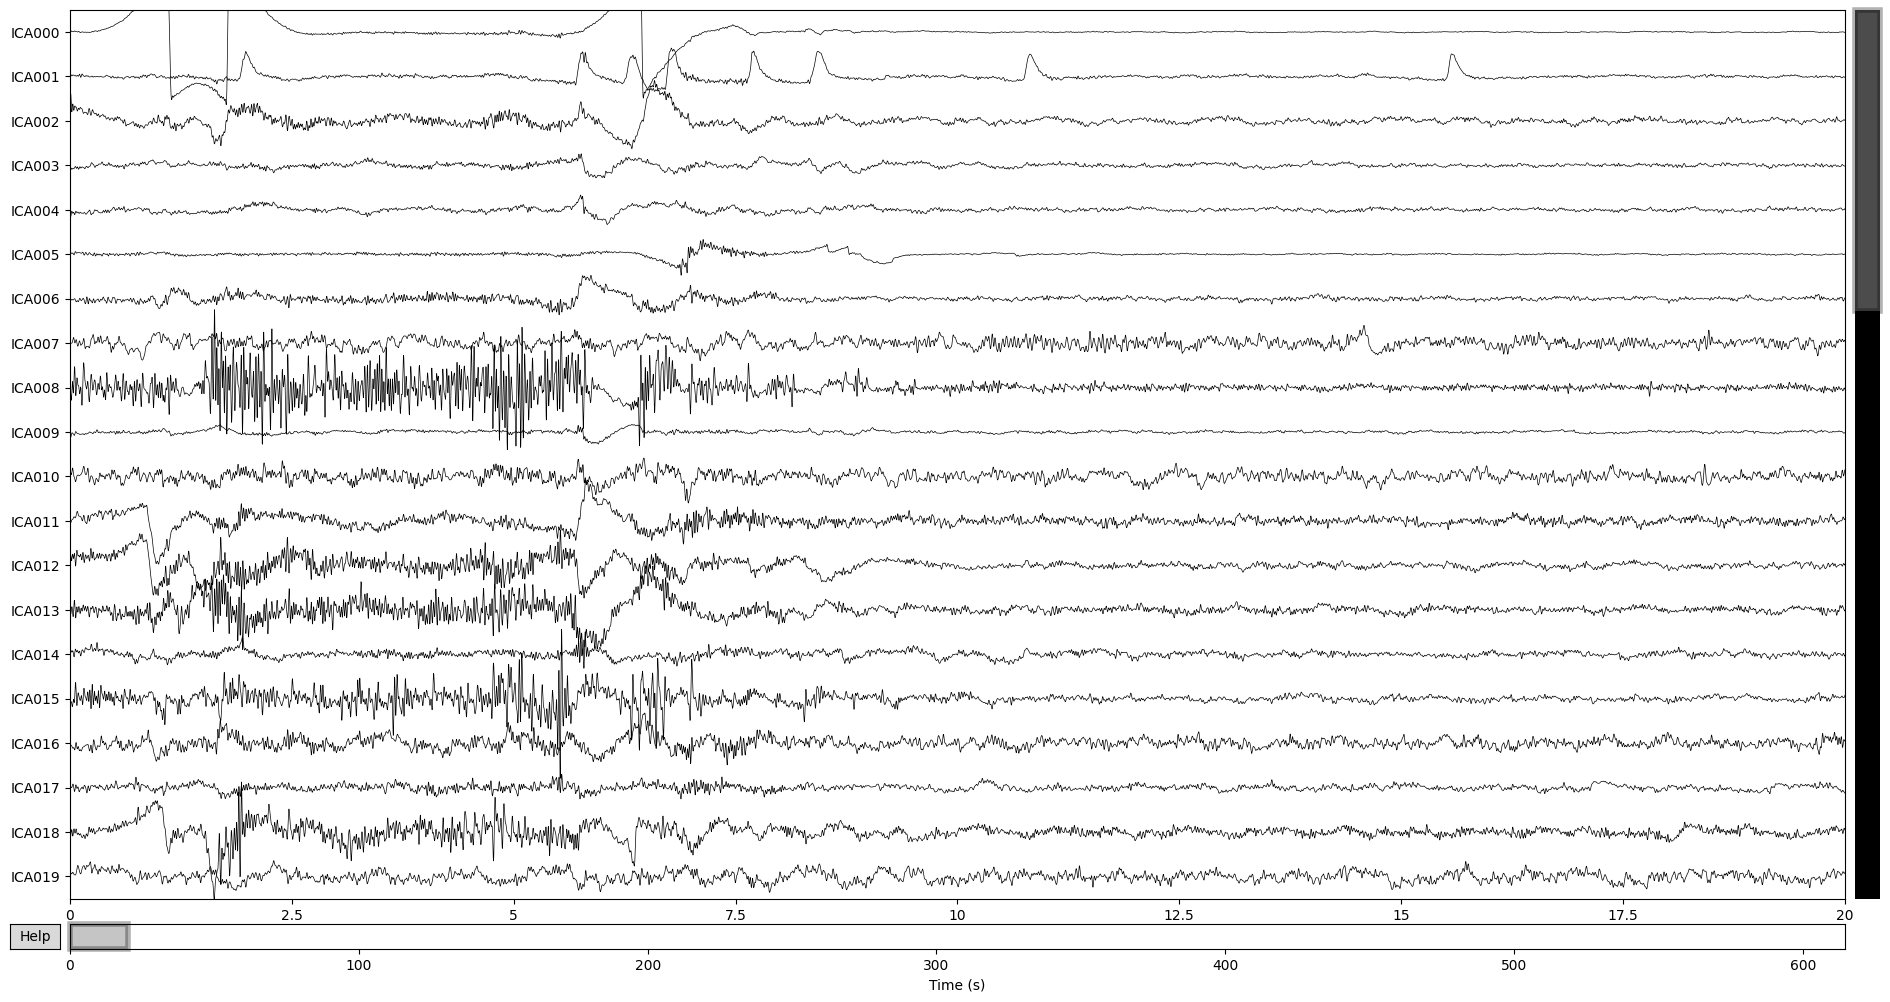

In [47]:
ica.plot_sources(r)

## Removing ICA components

In [73]:
# remove eye blinks
ica.exclude = [0,1, 2, 3, 4, 5, 9, 11, 14, 21, 24, 26, 29, 36, 43, 44, 46, 48, 54]

In [74]:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

reconst_raw.plot(scalings=dict(eeg=200e-6))
plt.show()
raw.plot(scalings=dict(eeg=200e-6))
plt.show()

Applying ICA to Raw instance
    Transforming to ICA space (59 components)
    Zeroing out 19 ICA components
    Projecting back using 64 PCA components


In [75]:
# Set the EEG reference to EXG1 and EXG2
reconst_raw.set_eeg_reference(['EX1', 'EX2'],projection=False)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.30 Hz
Lowpass,40.00 Hz


Channels marked as bad:
none
Channels marked as bad:
none


In [28]:
r.plot(scalings=dict(eeg=200e-6))
plt.show()

Channels marked as bad:
none


In [31]:
preprocessed_filename = Path(str(file_name).replace('.xdf', '_preprocessed.fif'))

reconst_raw.save(preprocessed_filename, overwrite=True)

Overwriting existing file.
Writing D:\pro\emile_final_bci_preprocessed.fif


C:\Users\Emile\AppData\Local\Temp\ipykernel_17268\2988932045.py:3: RuntimeWarning: This filename (D:\pro\emile_final_bci_preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw.save(preprocessed_filename, overwrite=True)


Closing D:\pro\emile_final_bci_preprocessed.fif
[done]


In [52]:
del raw, r, reconst_raw